# Estadística descriptiva

## ¿Qué vamos a ver hoy?

### Estadística descriptiva

Son herramientas que sirven para describir un conjunto de valores mediante algunas características del conjunto.

Vamos a ver que es y como calcular:

Maneras de buscar un valor representativo

- Media
- Mediana
- Moda

Maneras de cuantificar cuanto varian los valores

- Rango
- Varianza
- Desviacion estandar
- Coeficiente de variacion

Maneras de ver si diferentes aspectos o variables se vinculan entre si.

- Covarianza
- Correlacion

No vamos a ver hoy estaditica inferencial, es decir tratar de predecir que puede pasar o que probabilidad hay que de que sucedan cosas a partir de los datos conocidos.

### Herramientas basicas de visualización

No es el objetivo de la clase de hoy (hay mas de una clase que vamos a dedicar exclusivamente a eso), pero para ayudarnos a visualizar la infomacion vamos a ver como generar:

- Graficos de lineas
- Graficos de puntos
- Histogramas

## Idea de la clase

- Arranacamos con una pequeña encuesta que vamos a usar de ejemplo durante la clase.
- Vamos repasando con la presentacion las ideas y vamos probando implementar las ideas en los datos de la encuesta.
- Despues del ejemplo en conjunto queda el hands-on para que practiquen en clase (esperemos llegar).

# La encuesta....

https://forms.gle/JgpooKWc2L9vg5pn9

# Repaso de como leer un archivo csv


In [1]:
import numpy as np

In [2]:
filename = "Formulario C4.csv"
data_cruda = np.genfromtxt(filename, delimiter=",", dtype=str) # Notar que si no ponemos el separador correcto tira error. Y si no ponemos dtype lee todo como vacio.
data_cruda

alturas = data_cruda[1:,1].astype(int) # Seleccionamos la columna 1 desde la fila uno hasta el final
print (alturas)

pesos = data_cruda[1:,2].astype(int) # Seleccionamos la columna 1 desde la fila uno hasta el final
print (pesos)

[178 176 190 155]
[ 95  76 120  56]


# Ver primer parte de la presentación

In [3]:
# Calculamos la media, la mediana y la moda para las columnas

print (f'El valor medio para las alturas del curso es: {np.mean(alturas)}')
print (f'El valor medio para los pesos del curso es: {np.mean(pesos)}')

print (f'La mediana para las alturas del curso es: {np.median(alturas)}')
print (f'La mediana para los pesos del curso es: {np.median(pesos)}')

# numpy no tiene un metodo para calcular la moda!!!!!

# Pero otra libreria como scipy si

from scipy import stats # No funciona import scipy y usar scipy.stats

print (f'La moda para las alturas del curso es: {stats.mode(alturas)}') # Vemos que no tiene mucho sentido!

El valor medio para las alturas del curso es: 174.75
El valor medio para los pesos del curso es: 86.75
La mediana para las alturas del curso es: 177.0
La mediana para los pesos del curso es: 85.5
La moda para las alturas del curso es: ModeResult(mode=array([155]), count=array([1]))


# Como visualizar esto... (vamos a usar lo básico de Seaborn)

<AxesSubplot:>

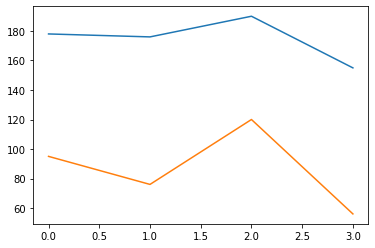

In [4]:
import seaborn as sns

# Hacer un grafico tipo "comun"

sns.lineplot(data = alturas)
sns.lineplot(data = pesos)


<AxesSubplot:>

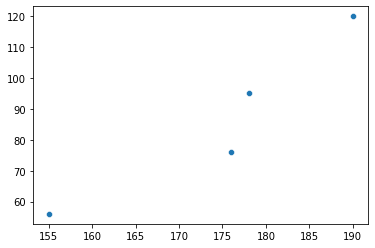

In [5]:
sns.scatterplot(x = alturas, y = pesos)

<AxesSubplot:ylabel='Count'>

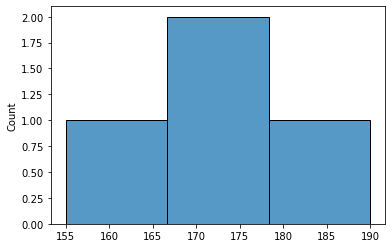

In [6]:
sns.histplot(alturas)

# Ideas de Dispersión

In [7]:
print (f'El rango de alturas va de: {np.max(alturas)}cm a {np.min(alturas)}cm, es decir que la alturas cubren un rango de {np.max(alturas)-np.min(alturas)}cm.' )

# Ahora queremos saber donde esta el 50% de las alturas mas comunes
# Numpy tiene una funcion que separa en partes ordenando

print (np.percentile(alturas, [75,25]))

print (f'El 50% de las alturas mas comunes estan entre: {np.percentile(alturas, [75 ,25])[1]}cm y {np.percentile(alturas, [75 ,25])[0]}cm.')

El rango de alturas va de: 190cm a 155cm, es decir que la alturas cubren un rango de 35cm.
[181.   170.75]
El 50% de las alturas mas comunes estan entre: 170.75cm y 181.0cm.


In [8]:
# Como pedirle a numpy que nos calcule la varianza

print (f'La viarianza en las alturas es de: {np.var(alturas)}cm^2')
print (f'La desviacion estandar es de: {np.std(alturas)}cm')

La viarianza en las alturas es de: 158.6875cm^2
La desviacion estandar es de: 12.597122687344122cm


In [9]:
# Vamos a calcular que porcentaje de los valores caen dentro de una desviacion estandar de la media

n = 1
sd = np.std(alturas)
mean = np.mean(alturas)

mascara = (mean - n * sd < alturas) & (alturas < mean + n * sd)
print (alturas[mascara])
print (mascara.sum())
print (f'El porcenaje de valores que caen dentro del rango indicado es: {mascara.sum()/len(mascara)*100}%')


[178 176]
2
El porcenaje de valores que caen dentro del rango indicado es: 50.0%


In [10]:
# Comparando variabilidades entre dos variables

print (f'La desviacion estandar de las alturas es {np.std(alturas)}cm, y su valor medio es {np.mean(alturas)}cm. Su ceoficiente de variación es {np.std(alturas)/np.mean(alturas)}')
print (f'La desviacion estandar de los pesos es {np.std(pesos)}Kg, y su valor medio es {np.mean(pesos)}Kg. Su ceoficiente de variación es {np.std(pesos)/np.mean(pesos)}')

La desviacion estandar de las alturas es 12.597122687344122cm, y su valor medio es 174.75cm. Su ceoficiente de variación es 0.07208653898337122
La desviacion estandar de los pesos es 23.636571240347024Kg, y su valor medio es 86.75Kg. Su ceoficiente de variación es 0.2724676800040003


# Covarianza y correlación

In [11]:
# Repasemos los graficos pero ahora vamos a agregar las columnas genero y nombre

sexo = data_cruda[1:,3]
sexo[sexo=="Varon"] = "-3"
sexo[sexo=="Mujer"] = "3"
sexo = sexo.astype(float)
print (sexo)

letras = data_cruda[1:,4].astype(float) # Seleccionamos la columna 1 desde la fila uno hasta el final
print (letras)


[-3.  3. -3.  3.]
[ 8.  5.  3. 10.]


### Comparamos alturas con pesos

<AxesSubplot:>

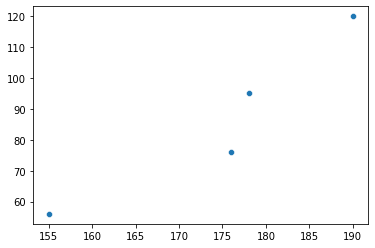

In [12]:
sns.scatterplot(x = alturas, y = pesos)

### Comparamos alturas con letras

<AxesSubplot:>

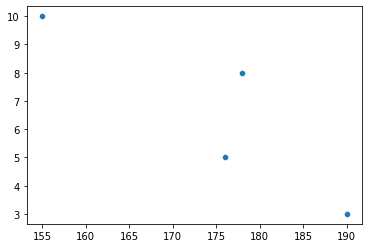

In [13]:
sns.scatterplot(x = alturas, y = letras)

### Vamos a ver esto en forma de matriz

In [24]:
# Armamos la matriz con todos los datos

datos = [alturas,pesos,sexo,letras]
print ("Matriz con los datos")
print (datos)

print (np.var(datos[0]))
datos2 = np.transpose(datos)
print (np.cov(datos,ddof=0))
print (np.corrcoef(datos))

Matriz con los datos
[array([178, 176, 190, 155]), array([ 95,  76, 120,  56]), array([-3.,  3., -3.,  3.]), array([ 8.,  5.,  3., 10.])]
158.6875
[[158.6875 281.9375 -27.75   -29.875 ]
 [281.9375 558.6875 -62.25   -48.875 ]
 [-27.75   -62.25     9.       3.    ]
 [-29.875  -48.875    3.       7.25  ]]
[[ 1.          0.9468845  -0.73429467 -0.88078022]
 [ 0.9468845   1.         -0.8778769  -0.76795061]
 [-0.73429467 -0.8778769   1.          0.37139068]
 [-0.88078022 -0.76795061  0.37139068  1.        ]]


# Para mirar en las notebooks...

## metodos

- around: Redondea los valores con un numero de decimales que se le pasa como parametro
- argmax: Busca el indice donde está el maximo valor

## librerias

- matplotlib: Sirve para graficar como seaborn, la vamos a ver bien mas adelante.
